In [35]:
!python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy

In [37]:
nlp = spacy.load("pl_core_news_lg")

In [39]:
MAIN_DATA = pd.read_csv("/content/drive/MyDrive/dane7.csv")

In [40]:
df_twitter = MAIN_DATA.copy()

In [41]:
pd.set_option("display.max_columns", None)

In [42]:
def remove_stopwords(text):

  '''

  Funkcja remove_stopwords służy do usuwania z tekstu wszystkich słów uznawanych za stopwords.
  Przyjmuje jako argument ciąg znaków text, który jest następnie przetwarzany przez model NLP.
  Tokeny oznaczone jako stopwords są pomijane, a wynikowy tekst, zwracany jest jako ciąg znaków.

  '''
  doc = nlp(text)
  return " ".join([token.text for token in doc if not token.is_stop])

def extract_persons(text):

  '''

  Funkcja extract_persons ma na celu identyfikację nazw własnych osób w podanym tekście.
  Otrzymuje tekst wejściowy jako argument i analizuje go za pomocą modelu NLP.
  Następnie wyszukuje encje oznaczone etykietą "persName" i zwraca listę wykrytych nazw.
  Jeśli w tekście nie znaleziono żadnych nazw własnych osób, funkcja zwraca None.

  '''

  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == "persName"]
  return persons if persons else None

def extract_places(text):

  '''

  Funkcja extract_places ma na celu identyfikację nazw własnych miejsc w podanym tekście.
  Otrzymuje tekst wejściowy jako argument i analizuje go za pomocą modelu NLP.
  Następnie wyszukuje encje oznaczone etykietą "placeName" i zwraca listę wykrytych nazw.
  Jeśli w tekście nie znaleziono żadnych nazw własnych miejsc, funkcja zwraca None.

  '''

  doc = nlp(text)
  places = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
  return places if places else None

def extract_organizations(text):

  '''

  Funkcja extract_organizations ma na celu identyfikację nazw własnych organizacji w podanym tekście.
  Otrzymuje tekst wejściowy jako argument i analizuje go za pomocą modelu NLP.
  Następnie wyszukuje encje oznaczone etykietą "orgName" i zwraca listę wykrytych nazw.
  Jeśli w tekście nie znaleziono żadnych nazw własnych organizacji, funkcja zwraca None.

  '''

  doc = nlp(text)
  organizations = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
  return organizations if organizations else None

In [43]:
#CZĘŚĆ 1
#1. Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at

In [44]:
df_twitter["created_at"]

0       Fri Jun 04 15:00:49 +0000 2021
1       Fri Jun 04 15:34:48 +0000 2021
2       Fri Jun 04 15:00:23 +0000 2021
3       Fri Jun 04 15:12:26 +0000 2021
4       Fri Jun 04 14:39:29 +0000 2021
                     ...              
5097    Tue Jun 01 02:04:38 +0000 2021
5098    Tue Jun 01 02:35:04 +0000 2021
5099    Tue Jun 01 02:56:11 +0000 2021
5100    Tue Jun 01 02:54:15 +0000 2021
5101    Tue Jun 01 02:55:37 +0000 2021
Name: created_at, Length: 5102, dtype: object

In [45]:
df_twitter["created_at"] = (
    df_twitter["created_at"]
    .str.replace("Mon", "poniedziałek")
    .str.replace("Tue", "wtorek")
    .str.replace("Wed", "środa")
    .str.replace("Thu", "czwartek")
    .str.replace("Fri", "piątek")
    .str.replace("Sat", "sobota")
    .str.replace("Sun", "niedziela")
)

In [46]:
df_twitter["created_at"]

0       piątek Jun 04 15:00:49 +0000 2021
1       piątek Jun 04 15:34:48 +0000 2021
2       piątek Jun 04 15:00:23 +0000 2021
3       piątek Jun 04 15:12:26 +0000 2021
4       piątek Jun 04 14:39:29 +0000 2021
                      ...                
5097    wtorek Jun 01 02:04:38 +0000 2021
5098    wtorek Jun 01 02:35:04 +0000 2021
5099    wtorek Jun 01 02:56:11 +0000 2021
5100    wtorek Jun 01 02:54:15 +0000 2021
5101    wtorek Jun 01 02:55:37 +0000 2021
Name: created_at, Length: 5102, dtype: object

In [47]:
#2. Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

In [48]:
df_twitter["user_created_at"]

0       Sun May 24 20:01:26 +0000 2015
1       Sat Feb 23 20:23:00 +0000 2019
2       Wed Nov 18 17:55:16 +0000 2020
3       Thu Mar 08 16:03:40 +0000 2018
4       Sat Jul 27 13:22:01 +0000 2019
                     ...              
5097    Sun Jul 05 08:04:13 +0000 2020
5098    Sun Jul 12 07:08:16 +0000 2020
5099    Mon Jul 23 08:28:16 +0000 2012
5100    Sun Mar 18 05:07:47 +0000 2018
5101    Thu Mar 12 02:01:58 +0000 2015
Name: user_created_at, Length: 5102, dtype: object

In [49]:
df_twitter["user_created_at"] = (
    df_twitter["user_created_at"]
    .str.replace("Jan", "01")
    .str.replace("Feb", "02")
    .str.replace("Mar", "03")
    .str.replace("Apr", "04")
    .str.replace("May", "05")
    .str.replace("Jun", "06")
    .str.replace("Jul", "07")
    .str.replace("Aug", "08")
    .str.replace("Sep", "09")
    .str.replace("Oct", "10")
    .str.replace("Nov", "11")
    .str.replace("Dec", "12")
)

In [50]:
df_twitter["user_created_at"]

0       Sun 05 24 20:01:26 +0000 2015
1       Sat 02 23 20:23:00 +0000 2019
2       Wed 11 18 17:55:16 +0000 2020
3       Thu 03 08 16:03:40 +0000 2018
4       Sat 07 27 13:22:01 +0000 2019
                    ...              
5097    Sun 07 05 08:04:13 +0000 2020
5098    Sun 07 12 07:08:16 +0000 2020
5099    Mon 07 23 08:28:16 +0000 2012
5100    Sun 03 18 05:07:47 +0000 2018
5101    Thu 03 12 02:01:58 +0000 2015
Name: user_created_at, Length: 5102, dtype: object

In [51]:
#3. Pobierz wszystkie linki do tweetów i przekaż je do listy.

In [53]:
lista_url = df_twitter["tweet_url"].to_list()

In [54]:
lista_url

['https://twitter.com/d3bil0x/status/1400829903591854083',
 'https://twitter.com/ftg_soccer/status/1400838456276918278',
 'https://twitter.com/marek14618246/status/1400829794598666245',
 'https://twitter.com/tokmada/status/1400832826812121093',
 'https://twitter.com/Krystyn01906241/status/1400824535499280386',
 'https://twitter.com/mirek65038903/status/1400836809525968896',
 'https://twitter.com/Hillview56/status/1400831842668982286',
 'https://twitter.com/Int_Wydarzenia/status/1400834632153718786',
 'https://twitter.com/GreatGreyTryjan/status/1400833111592669190',
 'https://twitter.com/piekoshevski/status/1400828064096002049',
 'https://twitter.com/Izabela12671885/status/1400824661852704770',
 'https://twitter.com/Ela32648496/status/1400836207584628740',
 'https://twitter.com/Kamilek01/status/1400824729221611520',
 'https://twitter.com/Lukasz_Malin/status/1400835145930788865',
 'https://twitter.com/emajoteweska/status/1400834250618900483',
 'https://twitter.com/tvnwarszawa/status/1400

In [55]:
#4. Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

In [56]:
df_twitter["text"]

0       💬@AKowalinski prezes RN Warszawa: Profanacje i...
1       GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...
2       Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...
3       Warszawa 04-06-2021\nBojówki OrdoZjebów w akcj...
4       @trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...
                              ...                        
5097    Wyobraziłam sobie, jakby wyglądała Warszawa,  ...
5098    Rada Warszawy podjęła uchwałę krajobrazową dot...
5099    Rada Warszawy podjęła uchwałę krajobrazową dot...
5100    Zbliża się 81 rocznica I Transportu do KL Ausc...
5101                                @_warszawa Skajak amo
Name: text, Length: 5102, dtype: object

In [57]:
url_pattern = r"http[s]?:\W\W\w*\W\w*\W\S*"

In [58]:
df_twitter["urls"] = [re.findall(url_pattern, elem) for elem in df_twitter["text"]]

In [59]:
df_twitter["urls"]

0       [https://t.co/n2sMsuAz1o]
1                              []
2       [https://t.co/ugQdFjGTc0]
3       [https://t.co/l6V6hRbp1M]
4                              []
                  ...            
5097                           []
5098                           []
5099                           []
5100    [https://t.co/eg2c3jnuKU]
5101                           []
Name: urls, Length: 5102, dtype: object

In [60]:
#5. Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

In [61]:
lista_media = df_twitter["media"].dropna().to_list()

In [62]:
lista_media

['https://twitter.com/piekoshevski/status/1400828064096002049/photo/1',
 'https://twitter.com/Tomasz_Walczak/status/1400838699928129536/photo/1',
 'https://twitter.com/AutoMapa/status/1400830216289857539/photo/1',
 'https://twitter.com/PolskaNormalna/status/1400828074053320704/video/1',
 'https://twitter.com/warszawabot/status/1400824738914709504/photo/1',
 'https://twitter.com/Kw_PSP_Wwa/status/1400838850763710466/photo/1',
 'https://twitter.com/sqesh2/status/1400834361898029064/photo/1',
 'https://twitter.com/Butkievic/status/1400834654077284361/photo/1',
 'https://twitter.com/themback/status/1400831534135906305/photo/1',
 'https://twitter.com/MichalSzczerba/status/1400509272979615746/photo/1',
 'https://twitter.com/WarszawskiBlog/status/1400820103709696014/photo/1',
 'https://twitter.com/AutoMapa/status/1400815115423961100/photo/1',
 'https://twitter.com/michalwm89/status/1400715748998275072/photo/1',
 'https://twitter.com/warszawa/status/1400814602053578758/photo/1',
 'https://twit

In [63]:
#6. Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [64]:
df_twitter["text_without_stopwords"] = df_twitter["text"].apply(remove_stopwords)

In [65]:
df_twitter["text_without_stopwords"]

0       💬 @AKowalinski prezes RN Warszawa : Profanacje...
1       GOAL ! Ursus Warszawa in Poland 3 . Liga \n Ur...
2       Scena 50 . Pogrzeb Jarosława Kaczyńskiego . Po...
3       Warszawa 04 - 06 - 2021 \n Bojówki OrdoZjebów ...
4       @trzaskowski _ @Tsihanouskaya @M_K_Blonska @ED...
                              ...                        
5097    Wyobraziłam , wyglądała Warszawa ,   PiS rządz...
5098    Rada Warszawy podjęła uchwałę krajobrazową dot...
5099    Rada Warszawy podjęła uchwałę krajobrazową dot...
5100    Zbliża 81 rocznica Transportu KL Auschwitz 14 ...
5101                                @_warszawa Skajak amo
Name: text_without_stopwords, Length: 5102, dtype: object

In [66]:
#CZĘŚĆ 2
#1. Wypisz top5 tweetów z największa liczbą polubień.

In [67]:
df_twitter.sort_values(by=["favorite_count"], ascending=False).head()

coordinates                           created_at          hashtags  \
484          NaN    piątek Jun 04 09:50:39 +0000 2021               NaN   
1124         NaN  czwartek Jun 03 17:46:45 +0000 2021  StandWithBelarus   
4770         NaN    wtorek Jun 01 08:15:35 +0000 2021               NaN   
3692         NaN    wtorek Jun 01 21:25:43 +0000 2021               NaN   
3193         NaN     środa Jun 02 08:23:19 +0000 2021               NaN   

                                                  media  \
484   https://twitter.com/trzaskowski_/status/140075...   
1124  https://twitter.com/MichalSzczerba/status/1400...   
4770                                                NaN   
3692                                                NaN   
3193  https://twitter.com/trzaskowski_/status/140000...   

                           urls  favorite_count                   id  \
484   [https://t.co/3lUibemkLj]            1384  1400751844415225857   
1124  [https://t.co/NSCx89TdY7]             743  1400509272979615746   
4770  [https://t.co/cc0AQFHY1z]             624  1399640757523386368   
3692  [https://t.co/pJor6dt2Tn]             605  1399839600168902657   
3193  [https://t.co/7NYFzsXjGh]             553  1400005093156691970   

     in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_user_id lang  \
484                      NaN                    NaN                  NaN   pl   
1124                     NaN                    NaN                  NaN   pl   
4770                     NaN                    NaN                  NaN   pl   
3692                     NaN                    NaN                  NaN   pl   
3193                     NaN                    NaN                  NaN   pl   

               place possibly_sensitive      quote_id  retweet_count  \
484              NaN              False           NaN            144   
1124  Warsaw, Poland              False           NaN             96   
4770             NaN              False           NaN             84   
3692             NaN              False  1.399787e+18            175   
3193             NaN              False           NaN             54   

      retweet_id retweet_screen_name  \
484          NaN                 NaN   
1124         NaN                 NaN   
4770         NaN                 NaN   
3692         NaN                 NaN   
3193         NaN                 NaN   

                                                 source  \
484   <a href="http://twitter.com/download/iphone" r...   
1124  <a href="http://twitter.com/download/iphone" r...   
4770  <a href="https://mobile.twitter.com" rel="nofo...   
3692  <a href="http://twitter.com/download/iphone" r...   
3193  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
484   Dziś z prezydent-elekt @Tsihanouskaya mówiliśm...   
1124  Warszawa czeka na @Tsihanouskaya. #StandWithBe...   
4770  Jasio, który nie panuje nad swoją jadaczką, zn...   
3692  Czyli prezydenci opozycji: \n👉Poznań -cieszy s...   
3193  Pierwszy z 21 nowych pociągów @SKM_Warszawa ju...   

                                              tweet_url  \
484   https://twitter.com/trzaskowski_/status/140075...   
1124  https://twitter.com/MichalSzczerba/status/1400...   
4770  https://twitter.com/KapenGenezyp/status/139964...   
3692  https://twitter.com/PatrykJaki/status/13998396...   
3193  https://twitter.com/trzaskowski_/status/140000...   

                    user_created_at             user_id  \
484   Thu 09 08 13:48:38 +0000 2011           370112160   
1124  Tue 07 21 21:00:37 +0000 2009            58919878   
4770  Sun 06 11 10:48:28 +0000 2017  873854439538511872   
3692  Sun 01 03 21:23:38 +0000 2010           101576198   
3193  Thu 09 08 13:48:38 +0000 2011           370112160   

      user_default_profile_image  \
484                        False   
1124                       False   
4770                       False   
3692                       False   
3193 

In [68]:
#2. Wypisz top5 tweetów z największa liczbą retweetów.

In [69]:
df_twitter.sort_values(by=["retweet_count"], ascending=False).head()

coordinates                           created_at  hashtags media  \
4396         NaN    wtorek Jun 01 12:35:42 +0000 2021       NaN   NaN   
618          NaN    piątek Jun 04 06:50:53 +0000 2021       NaN   NaN   
4758         NaN    wtorek Jun 01 08:21:32 +0000 2021  Warszawa   NaN   
4828         NaN    wtorek Jun 01 07:43:05 +0000 2021  Warszawa   NaN   
1173         NaN  czwartek Jun 03 15:03:44 +0000 2021  Warszawa   NaN   

                           urls  favorite_count                   id  \
4396  [https://t.co/AqlxWzn9u0]               0  1399706219066052613   
618   [https://t.co/ELmX7gsRAW]               0  1400706605260345345   
4758  [https://t.co/RROID305u2]               0  1399642253853925383   
4828  [https://t.co/RROID305u2]               0  1399632579532361728   
1173  [https://t.co/RROID305u2]               0  1400468246902550530   

     in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_user_id lang  \
4396                     NaN                    NaN                  NaN   pl   
618                      NaN                    NaN                  NaN   pl   
4758                     NaN                    NaN                  NaN   pl   
4828                     NaN                    NaN                  NaN   pl   
1173                     NaN                    NaN                  NaN   pl   

     place possibly_sensitive  quote_id  retweet_count    retweet_id  \
4396   NaN                NaN       NaN           1638  1.382435e+18   
618    NaN                NaN       NaN            896  1.182394e+18   
4758   NaN                NaN       NaN            865  1.394730e+18   
4828   NaN                NaN       NaN            865  1.394730e+18   
1173   NaN                NaN       NaN            865  1.394730e+18   

     retweet_screen_name                                             source  \
4396             dorzuta  <a href="http://twitter.com/download/android" ...   
618       PolskaNormalna  <a href="http://twitter.com/download/android" ...   
4758       dziadkowiebiz  <a href="https://mobile.twitter.com" rel="nofo...   
4828       dziadkowiebiz  <a href="http://twitter.com/download/android" ...   
1173       dziadkowiebiz  <a href="http://twitter.com/download/android" ...   

                                                   text  \
4396  HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...   
618   ‼️\nA teraz perełka. Finał Was rozwali. \n10-1...   
4758  UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...   
4828  UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...   
1173  UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...   

                                              tweet_url  \
4396  https://twitter.com/rayofwangxian/status/13997...   
618   https://twitter.com/Marcin_Pozn/status/1400706...   
4758  https://twitter.com/MarekPrus6/status/13996422...   
4828  https://twitter.com/Frosty_127/status/13996325...   
1173  https://twitter.com/pshemyslav1984/status/1400...   

                    user_created_at              user_id  \
4396  Fri 12 27 17:22:00 +0000 2019  1210611632608546819   
618   Mon 07 16 13:32:30 +0000 2018  1018850865829072897   
4758  Wed 05 13 17:26:44 +0000 2020  1260622450540371968   
4828  Sat 08 25 18:32:58 +0000 2018  1033421996686761985   
1173  Thu 02 06 18:44:25 +0000 2014           2328621843   

      user_default_profile_image  \
4396                       False   
618                        False   
4758                       False   
4828                       False   
1173                       False   

                                       user_description  \
4396  🕵🏻 23 • she/her • profpic by @ANGERYBLRB • nsf...   
618   #RóbmySwoje\nNajniżej upadło społeczeństwo, kt...   
4758  Film, książki, prawo, sport ( czynnie, nie prz...   
4828  she/her|intp| bts ot7 stan| \nGabryś' Girlfrie...   
1173  Fan, fanatyk? Legia ! Śmietnik prywatny! Odczu...   

      user_favourites_count  user_followers_count  user_friends_count  \
4396                  

In [70]:
#3. Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

In [71]:
filtered_sensitivity_df = df_twitter[df_twitter["possibly_sensitive"] != "true"]
display(filtered_sensitivity_df)

coordinates                         created_at  \
0            NaN  piątek Jun 04 15:00:49 +0000 2021   
1            NaN  piątek Jun 04 15:34:48 +0000 2021   
2            NaN  piątek Jun 04 15:00:23 +0000 2021   
3            NaN  piątek Jun 04 15:12:26 +0000 2021   
4            NaN  piątek Jun 04 14:39:29 +0000 2021   
...          ...                                ...   
5097         NaN  wtorek Jun 01 02:04:38 +0000 2021   
5098         NaN  wtorek Jun 01 02:35:04 +0000 2021   
5099         NaN  wtorek Jun 01 02:56:11 +0000 2021   
5100         NaN  wtorek Jun 01 02:54:15 +0000 2021   
5101         NaN  wtorek Jun 01 02:55:37 +0000 2021   

                              hashtags media                       urls  \
0     StudioRN Kowaliński Konfederacja   NaN  [https://t.co/n2sMsuAz1o]   
1                                  NaN   NaN                         []   
2                                  NaN   NaN  [https://t.co/ugQdFjGTc0]   
3                                  NaN   NaN  [https://t.co/l6V6hRbp1M]   
4                                  NaN   NaN                         []   
...                                ...   ...                        ...   
5097                               NaN   NaN                         []   
5098                               NaN   NaN                         []   
5099                               NaN   NaN                         []   
5100                               NaN   NaN  [https://t.co/eg2c3jnuKU]   
5101                               NaN   NaN                         []   

      favorite_count                   id in_reply_to_screen_name  \
0                  0  1400829903591854083                     NaN   
1                  0  1400838456276918278                     NaN   
2                  0  1400829794598666245                     NaN   
3                  0  1400832826812121093                     NaN   
4                  0  1400824535499280386            trzaskowski_   
...              ...                  ...                     ...   
5097               0  1399547406107217922                     NaN   
5098               0  1399555063237025792                     NaN   
5099               0  1399560380473647105                     NaN   
5100               0  1399559891358998534                     NaN   
5101               1  1399560236982276101               _warszawa   

      in_reply_to_status_id  in_reply_to_user_id lang place  \
0                       NaN                  NaN   pl   NaN   
1                       NaN                  NaN   pl   NaN   
2                       NaN                  NaN   pl   NaN   
3                       NaN                  NaN   pl   NaN   
4              1.400817e+18         3.701122e+08   pl   NaN   
...                     ...                  ...  ...   ...   
5097                    NaN                  NaN   pl   NaN   
5098                    NaN                  NaN   pl   NaN   
5099                    NaN                  NaN   pl   NaN   
5100                    NaN                  NaN   pl   NaN   
5101           1.398976e+18         1.398377e+09   pl   NaN   

     possibly_sensitive  quote_id  retweet_count    retweet_id  \
0                   NaN       NaN              5  1.400830e+18   
1                   NaN       NaN              0           NaN   
2                   NaN       NaN              1  1.400751e+18   
3                   NaN       NaN             18  1.400828e+18   
4                   NaN       NaN              0           NaN   
...                 ...       ...            ...           ...   
5097                NaN       NaN             34  1.399323e+18   
5098                NaN       NaN             37  1.399432e+18   
5099                NaN       NaN             37  1.399432e+18   
5100                NaN       NaN             33  1.399429e+18   
5101                NaN       NaN              0           NaN   

     retweet_screen_name                                        

In [72]:
#4. Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

In [73]:
df_twitter["user_created_at"] = pd.to_datetime(df_twitter["user_created_at"])

<ipython-input-73-9b8bfa60fb39>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_twitter["user_created_at"] = pd.to_datetime(df_twitter["user_created_at"])


In [74]:
df_twitter.sort_values(by=["user_created_at"], ascending=True).head(1)["user_screen_name"]

3772    hex24
Name: user_screen_name, dtype: object

In [75]:
filtered_oldest_author_df = df_twitter[df_twitter["user_screen_name"] == "hex24"]
display(filtered_oldest_author_df)

coordinates                         created_at hashtags media  \
3772         NaN  wtorek Jun 01 20:23:26 +0000 2021      NaN   NaN   

                           urls  favorite_count                   id  \
3772  [https://t.co/B08nciKDkY]               0  1399823926520393729   

     in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_user_id lang  \
3772                     NaN                    NaN                  NaN   pl   

     place possibly_sensitive  quote_id  retweet_count    retweet_id  \
3772   NaN                NaN       NaN             23  1.399692e+18   

     retweet_screen_name                                             source  \
3772         Policja_KSP  <a href="http://twitter.com/download/android" ...   

                                                   text  \
3772  Policjanci z wydziału do walki z przestępczośc...   

                                              tweet_url  \
3772  https://twitter.com/hex24/status/1399823926520...   

               user_created_at  user_id  user_default_profile_image  \
3772 2006-11-26 19:35:19+00:00    23293                       False   

                                       user_description  \
3772  "Prawda nie sprawia tyle dobrego, ile złego sp...   

      user_favourites_count  user_followers_count  user_friends_count  \
3772                 124474                   771                1883   

      user_listed_count user_location                       user_name  \
3772                  4        Polska  Hex 🇵🇱🇺🇦 #ReparationsForPoland   

     user_screen_name  user_statuses_count  user_time_zone user_urls  \
3772            hex24                72570             NaN       NaN   

      user_verified                             text_without_stopwords  
3772          False  Policjanci wydziału walki przestępczością prze...

In [76]:
#5. Wyświetl tweety użytkownika. który ma najwięcej followersów.

In [77]:
df_twitter.sort_values(by=["user_followers_count"], ascending=False).head(1)["user_screen_name"]

1550    tvn24
Name: user_screen_name, dtype: object

In [78]:
filtered_popular_author_df = df_twitter[df_twitter["user_screen_name"] == "tvn24"]
display(filtered_popular_author_df)

coordinates                           created_at hashtags media  \
1550         NaN  czwartek Jun 03 11:01:43 +0000 2021      NaN   NaN   
1792         NaN  czwartek Jun 03 07:34:35 +0000 2021      NaN   NaN   
2683         NaN     środa Jun 02 14:35:15 +0000 2021      NaN   NaN   
2720         NaN     środa Jun 02 15:00:28 +0000 2021      NaN   NaN   
4073         NaN    wtorek Jun 01 17:00:13 +0000 2021      NaN   NaN   
4737         NaN    wtorek Jun 01 09:19:08 +0000 2021      NaN   NaN   
4911         NaN    wtorek Jun 01 07:02:05 +0000 2021      NaN   NaN   

                           urls  favorite_count                   id  \
1550  [https://t.co/9dN2F3nukf]               0  1400407341875466242   
1792  [https://t.co/4pAbvhJooM]               0  1400355214381752329   
2683  [https://t.co/Jc6uhlpHlL]               0  1400098691860606976   
2720  [https://t.co/S8JoIYM4Jm]               0  1400105038236860421   
4073  [https://t.co/J5YwjOPMTy]               0  1399772787363958784   
4737  [https://t.co/P0j4uvcLuJ]               0  1399656749586604036   
4911  [https://t.co/xMDZZBCR0b]               0  1399622262232391681   

     in_reply_to_screen_name  in_reply_to_status_id  in_reply_to_user_id lang  \
1550                     NaN                    NaN                  NaN   pl   
1792                     NaN                    NaN                  NaN   pl   
2683                     NaN                    NaN                  NaN   pl   
2720                     NaN                    NaN                  NaN   pl   
4073                     NaN                    NaN                  NaN   pl   
4737                     NaN                    NaN                  NaN   pl   
4911                     NaN                    NaN                  NaN   pl   

     place possibly_sensitive  quote_id  retweet_count    retweet_id  \
1550   NaN              False       NaN              5  1.400402e+18   
1792   NaN                NaN       NaN              1  1.400355e+18   
2683   NaN                NaN       NaN              3  1.400097e+18   
2720   NaN              False       NaN              5  1.400104e+18   
4073   NaN              False       NaN              2  1.399761e+18   
4737   NaN                NaN       NaN              6  1.399656e+18   
4911   NaN              False       NaN              2  1.399620e+18   

     retweet_screen_name                                             source  \
1550         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
1792         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
2683         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
2720         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
4073         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
4737         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   
4911         tvnwarszawa  <a href="https://about.twitter.com/products/tw...   

                                                   text  \
1550  "Jego spokój pozytywnie udziela się pozostałym...   
1792  Zarząd Transportu Miejskiego zapowiada, że czę...   
2683  "Tylko w ostatnich czterech dniach zaszczepili...   
2720  W środę po południu w okolicach mostu Świętokr...   
4073  Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy   
4737  Aktywista miejski Jan Śpiewak przegrał proces ...   
4911  W poniedziałek późnym wieczorem na Mokotowie z...   

                                              tweet_url  \
1550  https://twitter.com/tvn24/status/1400407341875...   
1792  https://twitter.com/tvn24/status/1400355214381...   
2683  https://twitter.com/tvn24/status/1400098691860...   
2720  https://twitter.com/tvn24/status/1400105038236...   
4073  https://twitter.com/tvn24/status/1399772787363...   
4737  https://twitter.com/tvn24/status/1399656749586...   
4911  https://twitter.com/tvn24/status/1399622262232...   

               user_created_at   user_id  user

In [79]:
#6. Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

In [80]:
pd.set_option("display.max_rows", None)

In [81]:
filtered_verification_df = df_twitter[df_twitter["user_verified"] == True]
display(filtered_verification_df)

coordinates                           created_at  \
15           NaN    piątek Jun 04 15:02:30 +0000 2021   
31           NaN    piątek Jun 04 15:45:39 +0000 2021   
49           NaN    piątek Jun 04 15:44:32 +0000 2021   
105          NaN    piątek Jun 04 14:27:35 +0000 2021   
132          NaN    piątek Jun 04 13:45:25 +0000 2021   
150          NaN    piątek Jun 04 14:09:33 +0000 2021   
182          NaN    piątek Jun 04 12:46:00 +0000 2021   
190          NaN    piątek Jun 04 12:50:33 +0000 2021   
199          NaN    piątek Jun 04 12:55:16 +0000 2021   
261          NaN    piątek Jun 04 12:27:20 +0000 2021   
272          NaN    piątek Jun 04 11:31:10 +0000 2021   
322          NaN    piątek Jun 04 12:04:13 +0000 2021   
334          NaN    piątek Jun 04 12:18:02 +0000 2021   
346          NaN    piątek Jun 04 11:19:56 +0000 2021   
387          NaN    piątek Jun 04 10:59:59 +0000 2021   
394          NaN    piątek Jun 04 11:08:05 +0000 2021   
402          NaN    piątek Jun 04 10:38:03 +0000 2021   
478          NaN    piątek Jun 04 10:20:40 +0000 2021   
484          NaN    piątek Jun 04 09:50:39 +0000 2021   
503          NaN    piątek Jun 04 09:00:51 +0000 2021   
505          NaN    piątek Jun 04 10:19:00 +0000 2021   
508          NaN    piątek Jun 04 09:53:13 +0000 2021   
516          NaN    piątek Jun 04 10:19:38 +0000 2021   
583          NaN    piątek Jun 04 08:32:31 +0000 2021   
627          NaN    piątek Jun 04 07:25:30 +0000 2021   
633          NaN    piątek Jun 04 07:23:15 +0000 2021   
697          NaN    piątek Jun 04 07:29:26 +0000 2021   
787          NaN    piątek Jun 04 05:27:50 +0000 2021   
897          NaN  czwartek Jun 03 19:41:05 +0000 2021   
928          NaN  czwartek Jun 03 20:17:48 +0000 2021   
973          NaN  czwartek Jun 03 20:25:14 +0000 2021   
1046         NaN  czwartek Jun 03 19:16:06 +0000 2021   
1109         NaN  czwartek Jun 03 17:49:50 +0000 2021   
1124         NaN  czwartek Jun 03 17:46:45 +0000 2021   
1125         NaN  czwartek Jun 03 18:03:49 +0000 2021   
1199         NaN  czwartek Jun 03 16:18:29 +0000 2021   
1220         NaN  czwartek Jun 03 14:52:04 +0000 2021   
1230         NaN  czwartek Jun 03 13:43:30 +0000 2021   
1248         NaN  czwartek Jun 03 14:05:13 +0000 2021   
1275         NaN  czwartek Jun 03 14:05:07 +0000 2021   
1292         NaN  czwartek Jun 03 14:37:44 +0000 2021   
1323         NaN  czwartek Jun 03 13:09:27 +0000 2021   
1345         NaN  czwartek Jun 03 12:51:00 +0000 2021   
1379         NaN  czwartek Jun 03 13:14:08 +0000 2021   
1429         NaN  czwartek Jun 03 11:34:56 +0000 2021   
1457         NaN  czwartek Jun 03 11:38:55 +0000 2021   
1513         NaN  czwartek Jun 03 10:45:53 +0000 2021   
1515         NaN  czwartek Jun 03 10:41:18 +0000 2021   
1542         NaN  czwartek Jun 03 11:00:56 +0000 2021   
1550         NaN  czwartek Jun 03 11:01:43 +0000 2021   
1582         NaN  czwartek Jun 03 10:02:27 +0000 2021   
1604         NaN  czwartek Jun 03 09:54:29 +0000 2021   
1715         NaN  czwartek Jun 03 08:29:06 +0000 2021   
1734         NaN  czwartek Jun 03 08:53:27 +0000 2021   
1765         NaN  czwartek Jun 03 07:58:14 +0000 2021   
1791         NaN  czwartek Jun 03 07:33:45 +0000 2021   
1792         NaN  czwartek Jun 03 07:34:35 +0000 2021   
1795         NaN  czwartek Jun 03 07:00:57 +0000 2021   
1824         NaN  czwartek Jun 03 08:00:28 +0000 2021   
1841         NaN  czwartek Jun 03 06:33:09 +0000 2021   
1852         NaN  czwartek Jun 03 06:07:11 +0000 2021   
1878         NaN  czwartek Jun 03 06:50:00 +0000 2021   
1896         NaN  czwartek Jun 03 06:19:39 +0000 2021   
1909         NaN  czwartek Jun 03 06:31:04 +0000 2021   
2085         NaN     środa Jun 02 21:02:35 +0000 2021   
2225         NaN     środa Jun 02 18:37:52 +0000 2021   
2252         NaN     środa Jun 02 19:13:06 +0000 2021   
2305         NaN     środa Jun 02 18:00:39 +0000 2021   
2406         NaN     środa Jun 02 17:12:51 +0000 2021   
2439         Na

In [82]:
#7. Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

In [83]:
dzien_tygodnia = r"^\w*"

In [84]:
df_twitter["day_of_publication"] = [re.findall(dzien_tygodnia, elem) for elem in df_twitter["created_at"]]

In [85]:
df_twitter["day_of_publication"].value_counts().head(1)

day_of_publication
[środa]    1658
Name: count, dtype: int64

In [86]:
#CZĘŚĆ 3 pracując na kolumnie text:
#1. Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

In [87]:
df_twitter["persons"] = df_twitter["text"].apply(extract_persons)

In [88]:
df_twitter["persons"]

0                                          [@AKowalinski]
1                                                    None
2        [Jarosława Kaczyńskiego, Mateusza Morawieckiego]
3                                                    None
4                                          [@trzaskowski]
5                                          [@trzaskowski]
6                                        [#WolnaBiałoruś]
7                                                    None
8                                                    None
9                                                    None
10                                         [@trzaskowski]
11                                                   None
12                                         [@trzaskowski]
13                                                   None
14                                                   None
15                                                   None
16                                                   None
17                     [Józef Haller, Józefowi Hallerowi]
18                                                   None
19                                                   None
20                                                   None
21                                                   None
22                                           [#Korkometr]
23                                         [@trzaskowski]
24                                         [@AKowalinski]
25                                                 [Kasi]
26                                             [Grzegorz]
27                                                   None
28                                                   None
29                                                   None
30                                                   None
31                                                   None
32                                         [@trzaskowski]
33                                                   None
34                                         [@trzaskowski]
35                                  [#Rejewski, #Różycki]
36                                                   None
37                                       [#WolnaBiałoruś]
38                                                   None
39                                                   None
40                                                   None
41                                                   None
42                                                   None
43                                                   None
44                                                   None
45                                                   None
46                           [@trzaskowski, Kaczyńskiemu]
47                                         [@trzaskowski]
48                               [Jeju, #꽃스타그램, #wilanow]
49                                                   None
50                                       [#WolnaBiałoruś]
51                                                   None
52                                                   None
53                                                   None
54                                         [@trzaskowski]
55                                                 [Kasi]
56                                                   None
57                      [#hiphopproducer, #musicproducer]
58                                         [@AKowalinski]
59                                                   None
60                  [#DniaStrażaka, Jarosław Nowosielski]
61                                                   None
62                                         [@trzaskowski]
63                                                   None
64                                                   None
65                                                   None
66                                       [#WolnaBiałoruś]
67                                         [@AKowalinski]
68                                           [Łukaszenki

In [89]:
#2. Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

In [90]:
df_twitter["places"] = df_twitter["text"].apply(extract_places)

In [91]:
df_twitter["places"]

0                                                    None
1                                                 [Morąg]
2                             [Polska, Warszawa, Powązki]
3                                              [Warszawa]
4                                [@M_K_Blonska, Warszawy]
5                                                    None
6          [Warszawa, Białorusi, berlińskiego, Białorusi]
7                                           [Cichanouska]
8                                     [Warszawa, ursynów]
9                                    [Warszawa, Warszawą]
10                                                   None
11                                             [Warszawa]
12                                                   None
13                                              [Annopol]
14                                             [warszawa]
15                                                   None
16                                             [Warszawą]
17                                                   None
18                                             [Warszawa]
19                                                   None
20                                                   None
21                                                   None
22                                             [WARSZAWA]
23                                                   None
24                                                   None
25                                             [Warszawa]
26                                             [Warszawa]
27                                             [Warszawa]
28                                                   None
29                                             [Warszawa]
30                                             [Warszawa]
31                                                   None
32                                               [Czajki]
33                                             [Warszawa]
34                                               [Polsce]
35                                               [Polscy]
36                 [Białorusi, białoruskie, Białorusinom]
37         [Warszawa, Białorusi, berlińskiego, Białorusi]
38                                     [Polsce, Warszawa]
39                                                   None
40                                             [Warszawa]
41                                  [Warszawą, Nieporętu]
42                                                   None
43      [warszawa, warszawa, warszawa, warszawa, warsz...
44                                             [Warszawa]
45                 [Białorusi, białoruskie, Białorusinom]
46                                                   None
47                                                   None
48                             [Warsaw, Warszawa, Poland]
49                                                   None
50         [Warszawa, Białorusi, berlińskiego, Białorusi]
51                                            [#Warszawa]
52                                [Warszawa, Śródmieście]
53                                             [Warszawa]
54                                                   None
55                                             [Warszawa]
56                                             [Warszawa]
57                            [Wilanów, Warszawa, Poland]
58                                                   None
59                                             [Warszawa]
60                                   [powiatu płońskiego]
61                                             [Warszawa]
62                                         [@M_K_Blonska]
63                                             [Warszawa]
64                                                   None
65                                                   None
66         [Warszawa, Białorusi, berlińskiego, Białorusi]
67                                                   None
68                                            [Białorusi

In [92]:
#3. Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

In [93]:
df_twitter["organizations"] = df_twitter["text"].apply(extract_organizations)

In [94]:
df_twitter["organizations"]

0                                           [RN Warszawa]
1              [Ursus Warszawa in Poland, Ursus Warszawa]
2                                                    None
3                                                   [ONR]
4                                                    None
5                                                    None
6                                                    None
7                                                    None
8                                                    None
9                                                    None
10                                          [Solidarność]
11                                                  [ONR]
12                                                   None
13                                 [Tramwaje Warszawskie]
14                                                   None
15                                                   None
16                                                   None
17                                             [IPN, WBH]
18                                                   None
19                                       [„Solidarności”]
20                                       [„Solidarności”]
21                                       [„Solidarności”]
22                                                   None
23                                                   None
24                                          [RN Warszawa]
25                                                   None
26                                                   None
27                                                   None
28                              [https://t.co/b4ImnnLNbu]
29                                                  [ONR]
30                                         [Solidarności]
31                                                   None
32                                                   None
33                                                  [ONR]
34                                       [„Solidarności”]
35                                                   None
36                                                   None
37                                                   None
38                                                   None
39                                       [„Solidarności”]
40                                                   None
41                                                   None
42                                       [„Solidarności”]
43                                        [@EVASFINELINE]
44                                                  [ONR]
45                                                   None
46                                                   None
47                                                   None
48                                              [#warsaw]
49                                                   None
50                                                   None
51                                                   None
52                                                   None
53                                                   None
54                                                   None
55                                                   None
56                                                  [ONR]
57                                                   None
58                                          [RN Warszawa]
59                                                  [ONR]
60                              [@WasikMaciej, #PSP, OSP]
61                                                  [ONR]
62                                                   None
63                                                  [ONR]
64                                       [Gmina Warszawa]
65                                                   None
66                                                   None
67                                          [RN Warszawa]
68                                                   Non

In [95]:
#CZĘŚĆ 4
#1. Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

In [96]:
df_twitter["day_of_publication"].value_counts()

day_of_publication
[środa]       1658
[wtorek]      1477
[czwartek]    1203
[piątek]       764
Name: count, dtype: int64

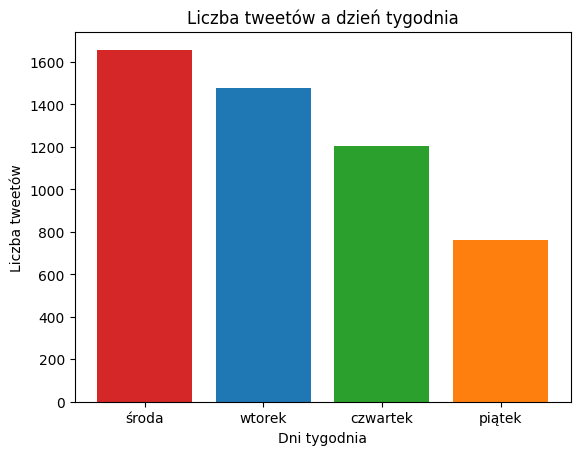

In [97]:
# @title
fig, ax = plt.subplots()

dni_tygodnia = df_twitter["day_of_publication"]
counts = df_twitter["day_of_publication"].value_counts()
bar_labels = [label[0] for label in counts.index]
bar_colors = ["tab:red", "tab:blue", "tab:green", "tab:orange", "tab:purple", "tab:brown", "tab:pink"]

ax.bar(bar_labels, counts, color=bar_colors[:len(counts)])

ax.set_xlabel("Dni tygodnia")
ax.set_ylabel("Liczba tweetów")
ax.set_title("Liczba tweetów a dzień tygodnia")

plt.show()